***FLIGHT PREDICTION***

**INFO**

In [1]:
import pandas as pd
df = pd.read_csv('Clean_Dataset.csv')
df.shape

(293486, 12)

<Axes: ylabel='count'>

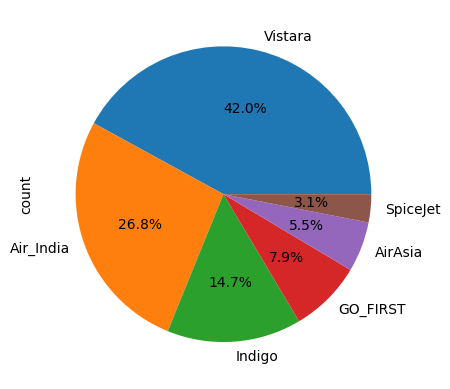

In [2]:
df.isnull().sum()
round(df['airline'].value_counts()/df.shape[0]*100,2).plot.pie(autopct = "%1.1f%%")

In [3]:
df.drop(labels='Unnamed: 0',axis=1, inplace= True )
df

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1.0,5953.0
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5953.0
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1.0,5956.0
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1.0,5955.0
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1.0,5955.0
...,...,...,...,...,...,...,...,...,...,...,...
293481,Vistara,UK-824,Chennai,Night,one,Early_Morning,Bangalore,Business,11.33,4.0,50449.0
293482,Vistara,UK-824,Chennai,Night,one,Evening,Bangalore,Business,22.75,4.0,50449.0
293483,Vistara,UK-824,Chennai,Night,one,Night,Bangalore,Business,26.33,4.0,50449.0
293484,Air_India,AI-766,Chennai,Early_Morning,one,Afternoon,Bangalore,Business,31.33,4.0,50838.0


In [4]:
df.describe()

,duration,days_left,price
count,293485.000000,293485.000000,293485.000000
mean,12.137148,26.000361,20143.010743
std,7.185884,13.564280,22350.592008
min,0.830000,1.000000,1105.000000
25%,6.750000,15.000000,4732.000000
50%,11.170000,26.000000,7268.000000
75%,16.080000,38.000000,39555.000000
max,49.830000,49.000000,123071.000000


In [5]:
df.airline.value_counts()

airline
Vistara      123353
Air_India     78731
Indigo        43120
GO_FIRST      23173
AirAsia       16098
SpiceJet       9011
Name: count, dtype: int64

In [6]:
df.source_city.value_counts()

source_city
Delhi        61343
Mumbai       60896
Bangalore    52061
Kolkata      46347
Hyderabad    40806
Chennai      32033
Name: count, dtype: int64

In [7]:
df.destination_city.value_counts()

destination_city
Mumbai       59097
Delhi        57360
Bangalore    48624
Kolkata      47402
Hyderabad    40634
Chennai      40368
Name: count, dtype: int64

In [8]:
df.departure_time.value_counts()

departure_time
Morning          69396
Early_Morning    65100
Evening          64182
Afternoon        47013
Night            46489
Late_Night        1306
Name: count, dtype: int64

In [9]:
df.arrival_time.value_counts()

arrival_time
Night            89767
Evening          76154
Morning          61189
Afternoon        37435
Early_Morning    15078
Late_Night       13862
Evenin               1
Name: count, dtype: int64

In [10]:
df.stops.value_counts()

stops
one            244273
zero            35950
two_or_more     13263
Name: count, dtype: int64

In [11]:
df['class'].value_counts()

class
Economy     206666
Business     86819
Name: count, dtype: int64

**Preprocessing**


In [12]:
df = df.drop('flight', axis = 1)

In [13]:
#Binary encoding
df['class'] = df['class'].apply(lambda x: 1 if x=='Business' else 0)
df['stops'] = pd.factorize(df.stops)[0]

In [14]:
#One-hot encoding
df= df.join(pd.get_dummies(df.airline, prefix= 'airline')).drop('airline', axis= 1)
df= df.join(pd.get_dummies(df.source_city, prefix= 'source')).drop('source_city', axis= 1)
df= df.join(pd.get_dummies(df.destination_city, prefix= 'destination')).drop('destination_city', axis= 1)
df= df.join(pd.get_dummies(df.arrival_time, prefix= 'arrival')).drop('arrival_time', axis= 1)
df= df.join(pd.get_dummies(df.departure_time, prefix= 'departure')).drop('departure_time', axis= 1)

In [15]:
df

,stops,class,duration,days_left,price,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1.0,5953.0,False,False,False,False,True,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1.0,5953.0,False,False,False,False,True,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1.0,5956.0,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1.0,5955.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1.0,5955.0,False,False,False,False,False,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293481,1,1,11.33,4.0,50449.0,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,True
293482,1,1,22.75,4.0,50449.0,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,True
293483,1,1,26.33,4.0,50449.0,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True
293484,1,1,31.33,4.0,50838.0,False,True,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X, y = df.drop('price', axis = 1), df.price
X

,stops,class,duration,days_left,airline_AirAsia,airline_Air_India,airline_GO_FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,arrival_Evening,arrival_Late_Night,arrival_Morning,arrival_Night,departure_Afternoon,departure_Early_Morning,departure_Evening,departure_Late_Night,departure_Morning,departure_Night
0,0,0,2.17,1.0,False,False,False,False,True,False,...,False,False,False,True,False,False,True,False,False,False
1,0,0,2.33,1.0,False,False,False,False,True,False,...,False,False,True,False,False,True,False,False,False,False
2,0,0,2.17,1.0,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,0,0,2.25,1.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
4,0,0,2.33,1.0,False,False,False,False,False,True,...,False,False,True,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293481,1,1,11.33,4.0,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
293482,1,1,22.75,4.0,False,False,False,False,False,True,...,True,False,False,False,False,False,False,False,False,True
293483,1,1,26.33,4.0,False,False,False,False,False,True,...,False,False,False,True,False,False,False,False,False,True
293484,1,1,31.33,4.0,False,True,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


In [28]:
y

0          5953.0
1          5953.0
2          5956.0
3          5955.0
4          5955.0
           ...   
293481    50449.0
293482    50449.0
293483    50449.0
293484    50838.0
293485        NaN
Name: price, Length: 293486, dtype: float64

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)

In [46]:
import numpy as np
# Remove rows containing NaNs
X_train = X_train[~np.isnan(X_train).any(axis=1)]
y_train = y_train[~np.isnan(y_train)]


In [47]:
reg = RandomForestRegressor(n_jobs=-1)

In [48]:
reg.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1)

In [49]:
#Evaluate the model
reg.score(X_test, y_test)

0.9859056216388147

In [50]:
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_pred = reg.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9859056216388147
MAE: 1038.5969101063483
MSE: 7017442.931519369
RMSE: 2649.0456642948548


Text(0.5, 1.0, 'Predicted vs Actual Price')

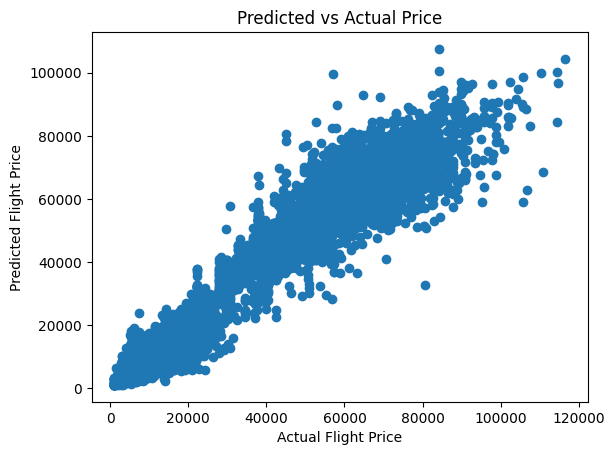

In [51]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Predicted vs Actual Price')

In [52]:
df.price.describe()


count    293485.000000
mean      20143.010743
std       22350.592008
min        1105.000000
25%        4732.000000
50%        7268.000000
75%       39555.000000
max      123071.000000
Name: price, dtype: float64

In [56]:
importances = dict(zip(reg.feature_names_in_, reg.feature_importances_))
sorted_importances = sorted(importances.items(), key= lambda x: x[1], reverse= True)

sorted_importances

[('class', 0.8777040435628887),
 ('duration', 0.05922378037052931),
 ('days_left', 0.01862815221585016),
 ('airline_Vistara', 0.005968557484950979),
 ('airline_Air_India', 0.00559087181532211),
 ('source_Delhi', 0.00249691948538472),
 ('source_Kolkata', 0.0022746994560764572),
 ('destination_Kolkata', 0.002200575837103906),
 ('destination_Delhi', 0.002099744695370775),
 ('source_Bangalore', 0.0018719982487396417),
 ('stops', 0.001854030062571195),
 ('destination_Hyderabad', 0.0017470688688302693),
 ('destination_Chennai', 0.0016770767675008775),
 ('destination_Mumbai', 0.0015894352483432294),
 ('source_Hyderabad', 0.0014964402297998032),
 ('arrival_Night', 0.0013064002306243045),
 ('arrival_Evening', 0.0012756892431464982),
 ('departure_Evening', 0.0012631376262704505),
 ('source_Mumbai', 0.0011828353911831975),
 ('destination_Bangalore', 0.0010868922784827567),
 ('departure_Morning', 0.0009511148281209245),
 ('arrival_Afternoon', 0.0008499627539616353),
 ('source_Chennai', 0.000807121

In [57]:
df.days_left.describe()


count    293485.000000
mean         26.000361
std          13.564280
min           1.000000
25%          15.000000
50%          26.000000
75%          38.000000
max          49.000000
Name: days_left, dtype: float64

<BarContainer object of 5 artists>

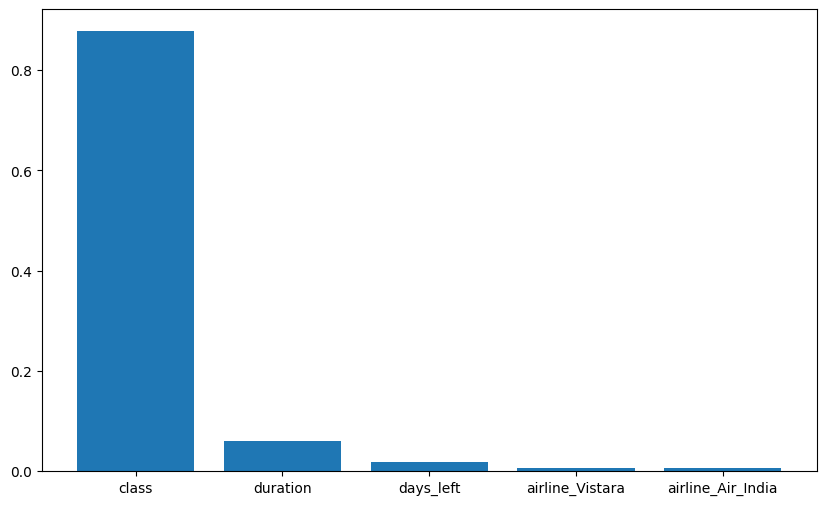

In [58]:
plt.figure(figsize=(10, 6))
plt.bar([x[0] for x in sorted_importances[:5]], [x[1] for x in sorted_importances[:5]])

**Hyperparameter Tuning**

In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [60]:
param_dist = {
       'n_estimators': randint(100, 300),
       'max_depth': [None, 10, 20, 30, 40, 50],
       'min_samples_split': randint(2, 11),
       'min_samples_leaf': randint(1, 5),
       'max_features': [1.0, 'auto', 'sqrt'] #thinks the default was 1.0
}

In [61]:
reg = RandomForestRegressor(n_jobs= -1)

In [62]:
random_search = RandomizedSearchCV(estimator= reg, param_distributions=param_dist, n_iter=2, cv=3, scoring = 'neg_mean_squared_error', verbose= 2, random_state= 10, n_jobs= -1)
random_search.fit(X_train, y_train)

Fitting 3 folds for each of 2 candidates, totalling 6 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(n_jobs=-1), n_iter=2,
                   n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [1.0, 'auto', 'sqrt'],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b01ed86fd00>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b01ed6db700>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7b01ec577610>},
                   random_state=10, scoring='neg_mean_squared_error',
                   verbose=2)

In [63]:
best_regressor = random_search.best_estimator_

In [64]:
best_regressor.score(X_test, y_test)

0.9868874653513604

In [66]:
y_pred = best_regressor.predict(X_test)

print('R2:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', math.sqrt(mean_squared_error(y_test, y_pred)))

R2: 0.9868874653513604
MAE: 1051.4958776056708
MSE: 6528593.26082834
RMSE: 2555.1112032215624


Text(0.5, 1.0, 'Predicted vs Actual Price')

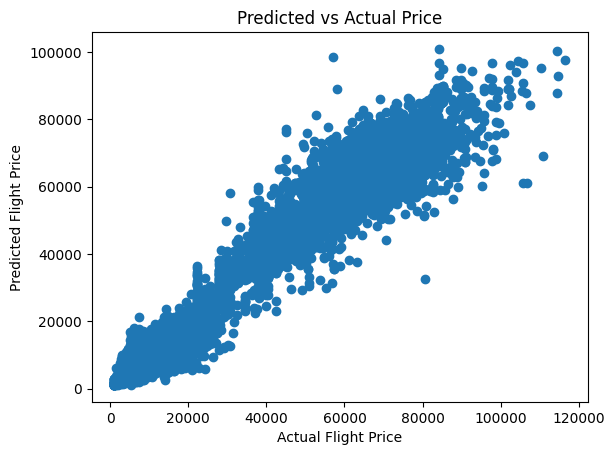

In [67]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Flight Price')
plt.ylabel('Predicted Flight Price')
plt.title('Predicted vs Actual Price')